In [51]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import category_encoders as ce

import warnings
warnings.filterwarnings("ignore")

In [52]:
# Loading Dataset
company = pd.read_csv('Company_Data.csv')

In [53]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [54]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [55]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [56]:
company.shape

(400, 11)

In [57]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [58]:
company.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
342,7.81,137,102,13,422,118,Medium,71,10,No,Yes
88,6.56,117,42,7,144,111,Medium,62,10,Yes,Yes
10,9.01,121,78,9,150,100,Bad,26,10,No,Yes
290,9.49,107,111,14,400,103,Medium,41,11,No,Yes
130,8.41,94,84,13,497,77,Medium,51,12,Yes,Yes
322,9.16,140,50,10,300,139,Good,60,15,Yes,Yes
12,3.98,122,35,2,393,136,Medium,62,18,Yes,No
47,4.38,126,98,0,173,108,Bad,55,16,Yes,No
385,5.87,131,73,13,455,132,Medium,62,17,Yes,Yes
139,12.30,146,62,10,310,94,Medium,30,13,No,Yes


In [59]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [60]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [61]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [62]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [63]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [64]:
company.isnull()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
395,False,False,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False,False,False
397,False,False,False,False,False,False,False,False,False,False,False
398,False,False,False,False,False,False,False,False,False,False,False


In [65]:
# pairplot
import seaborn as sns
sns.pairplot(company)

In [66]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


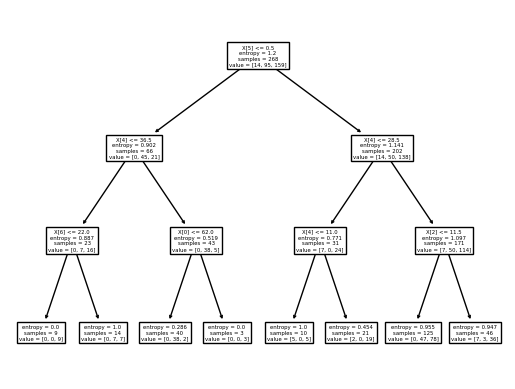

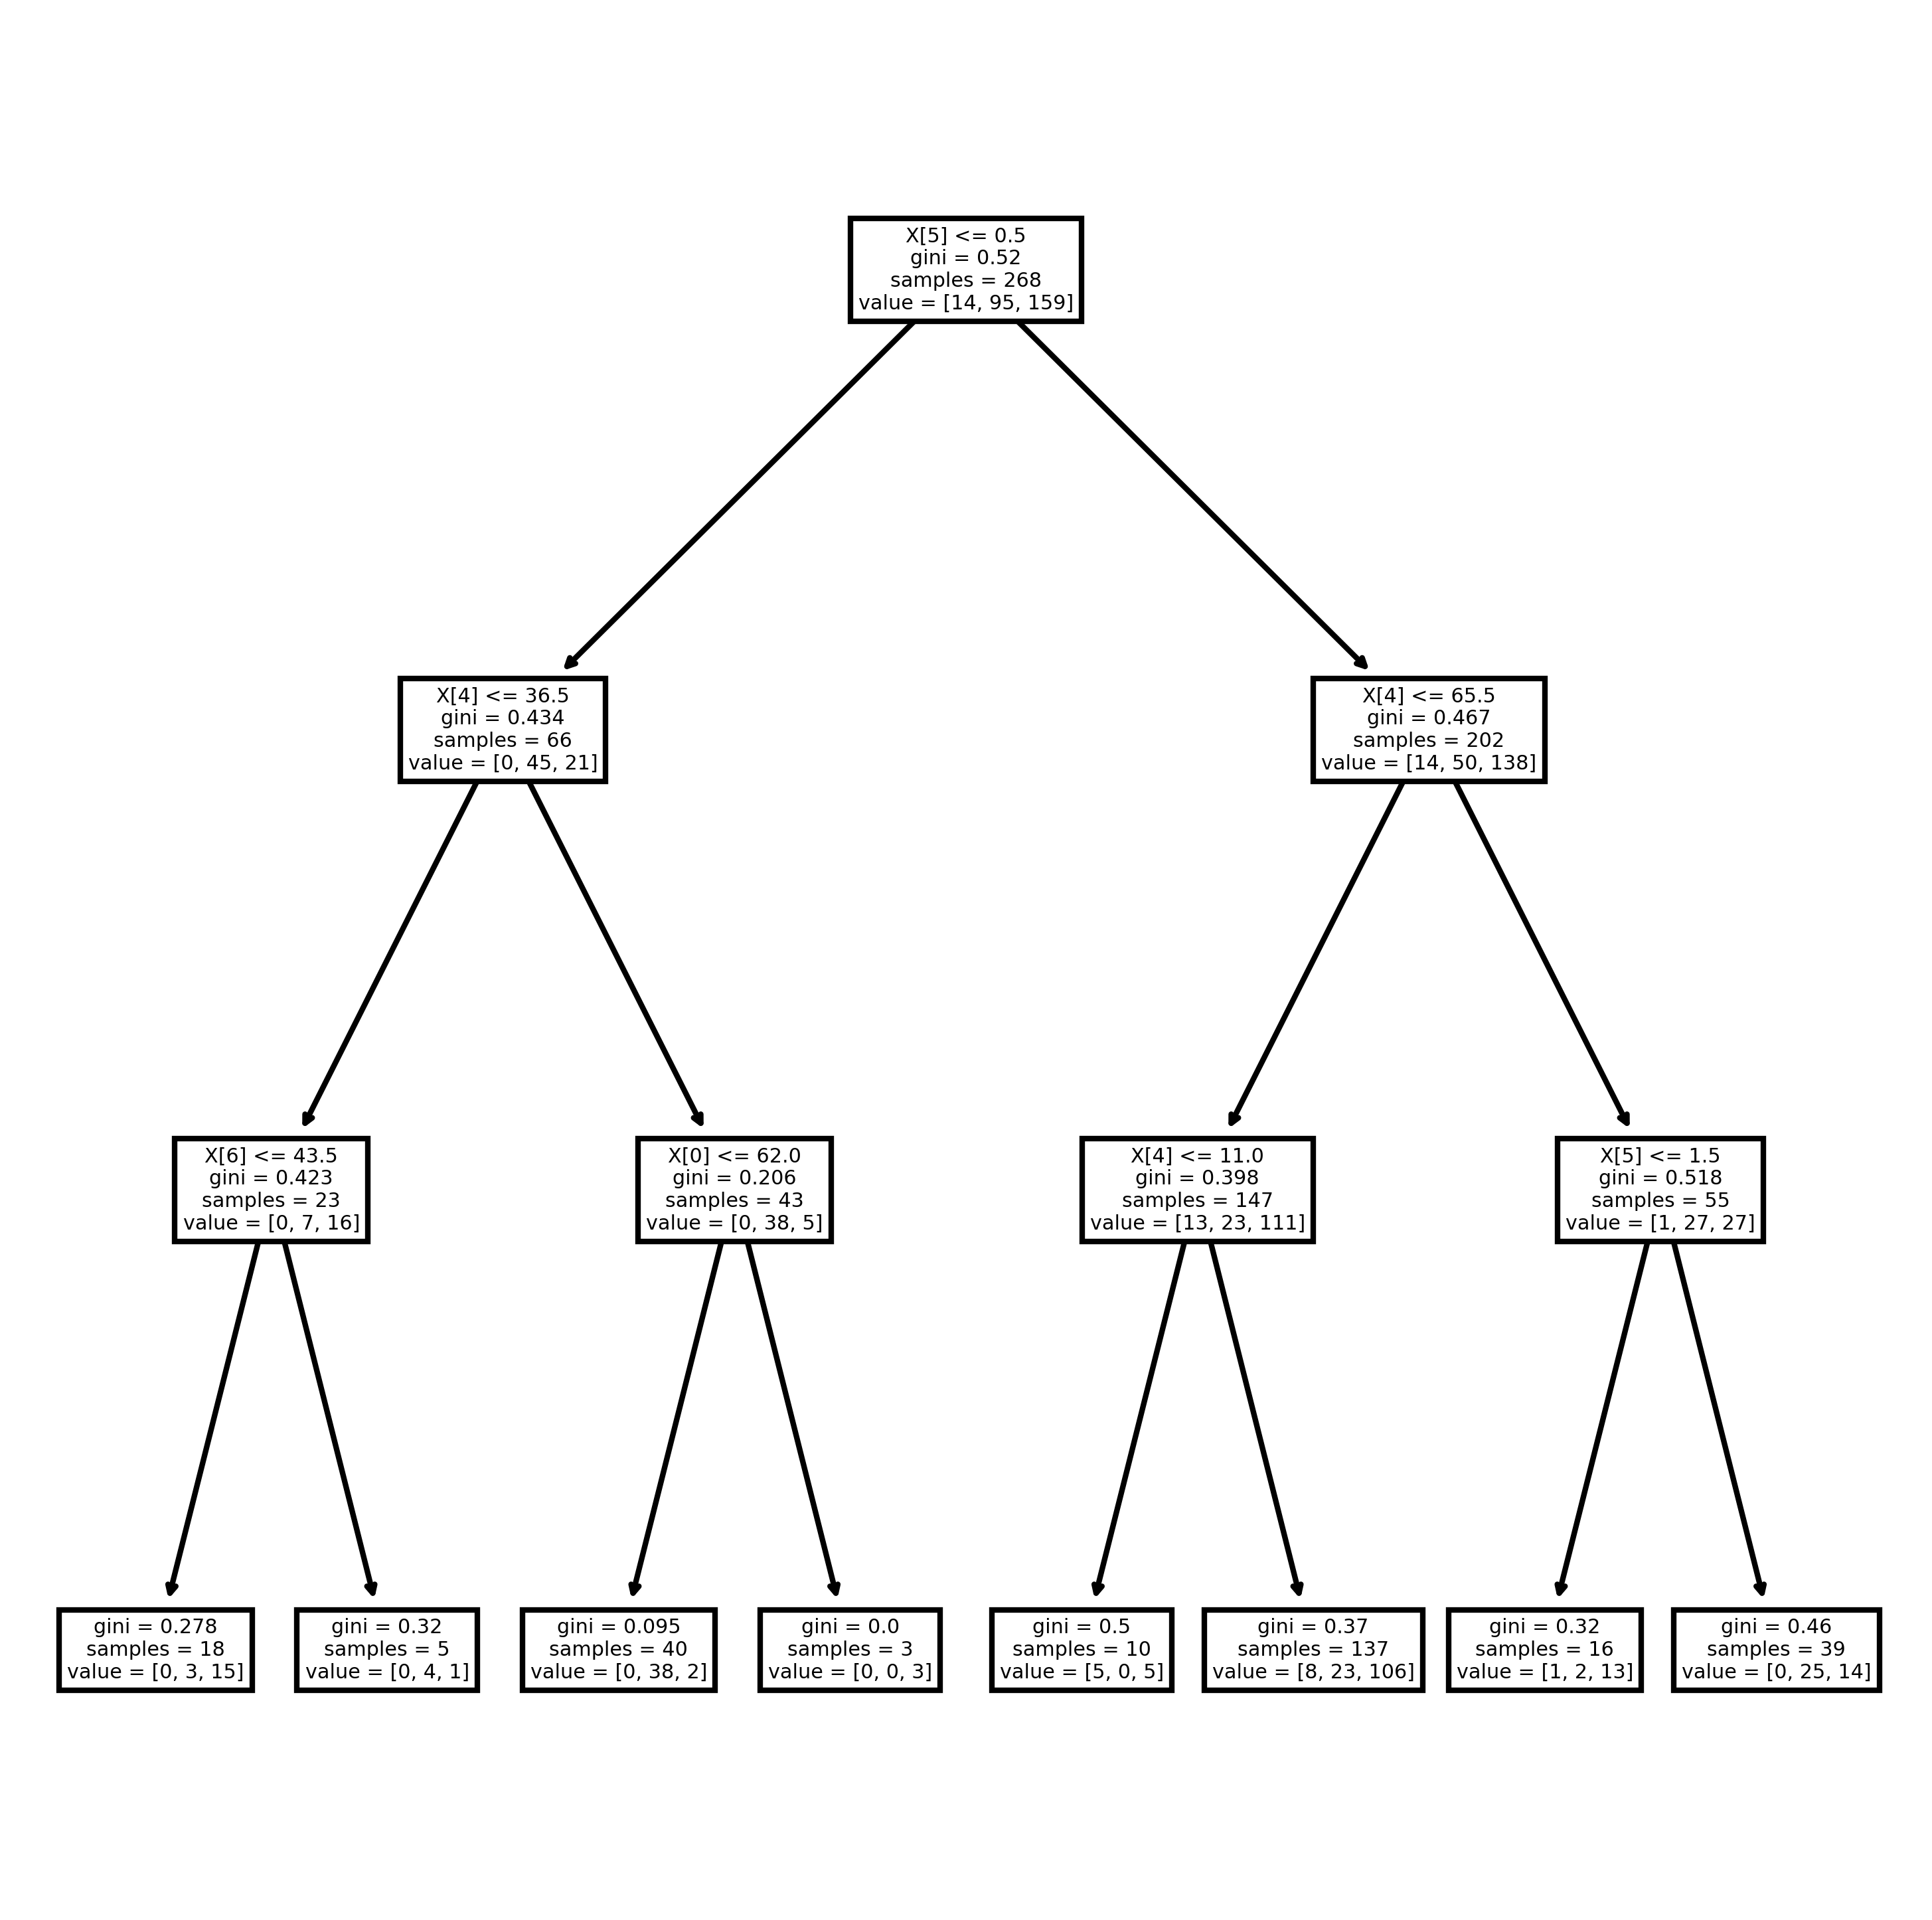

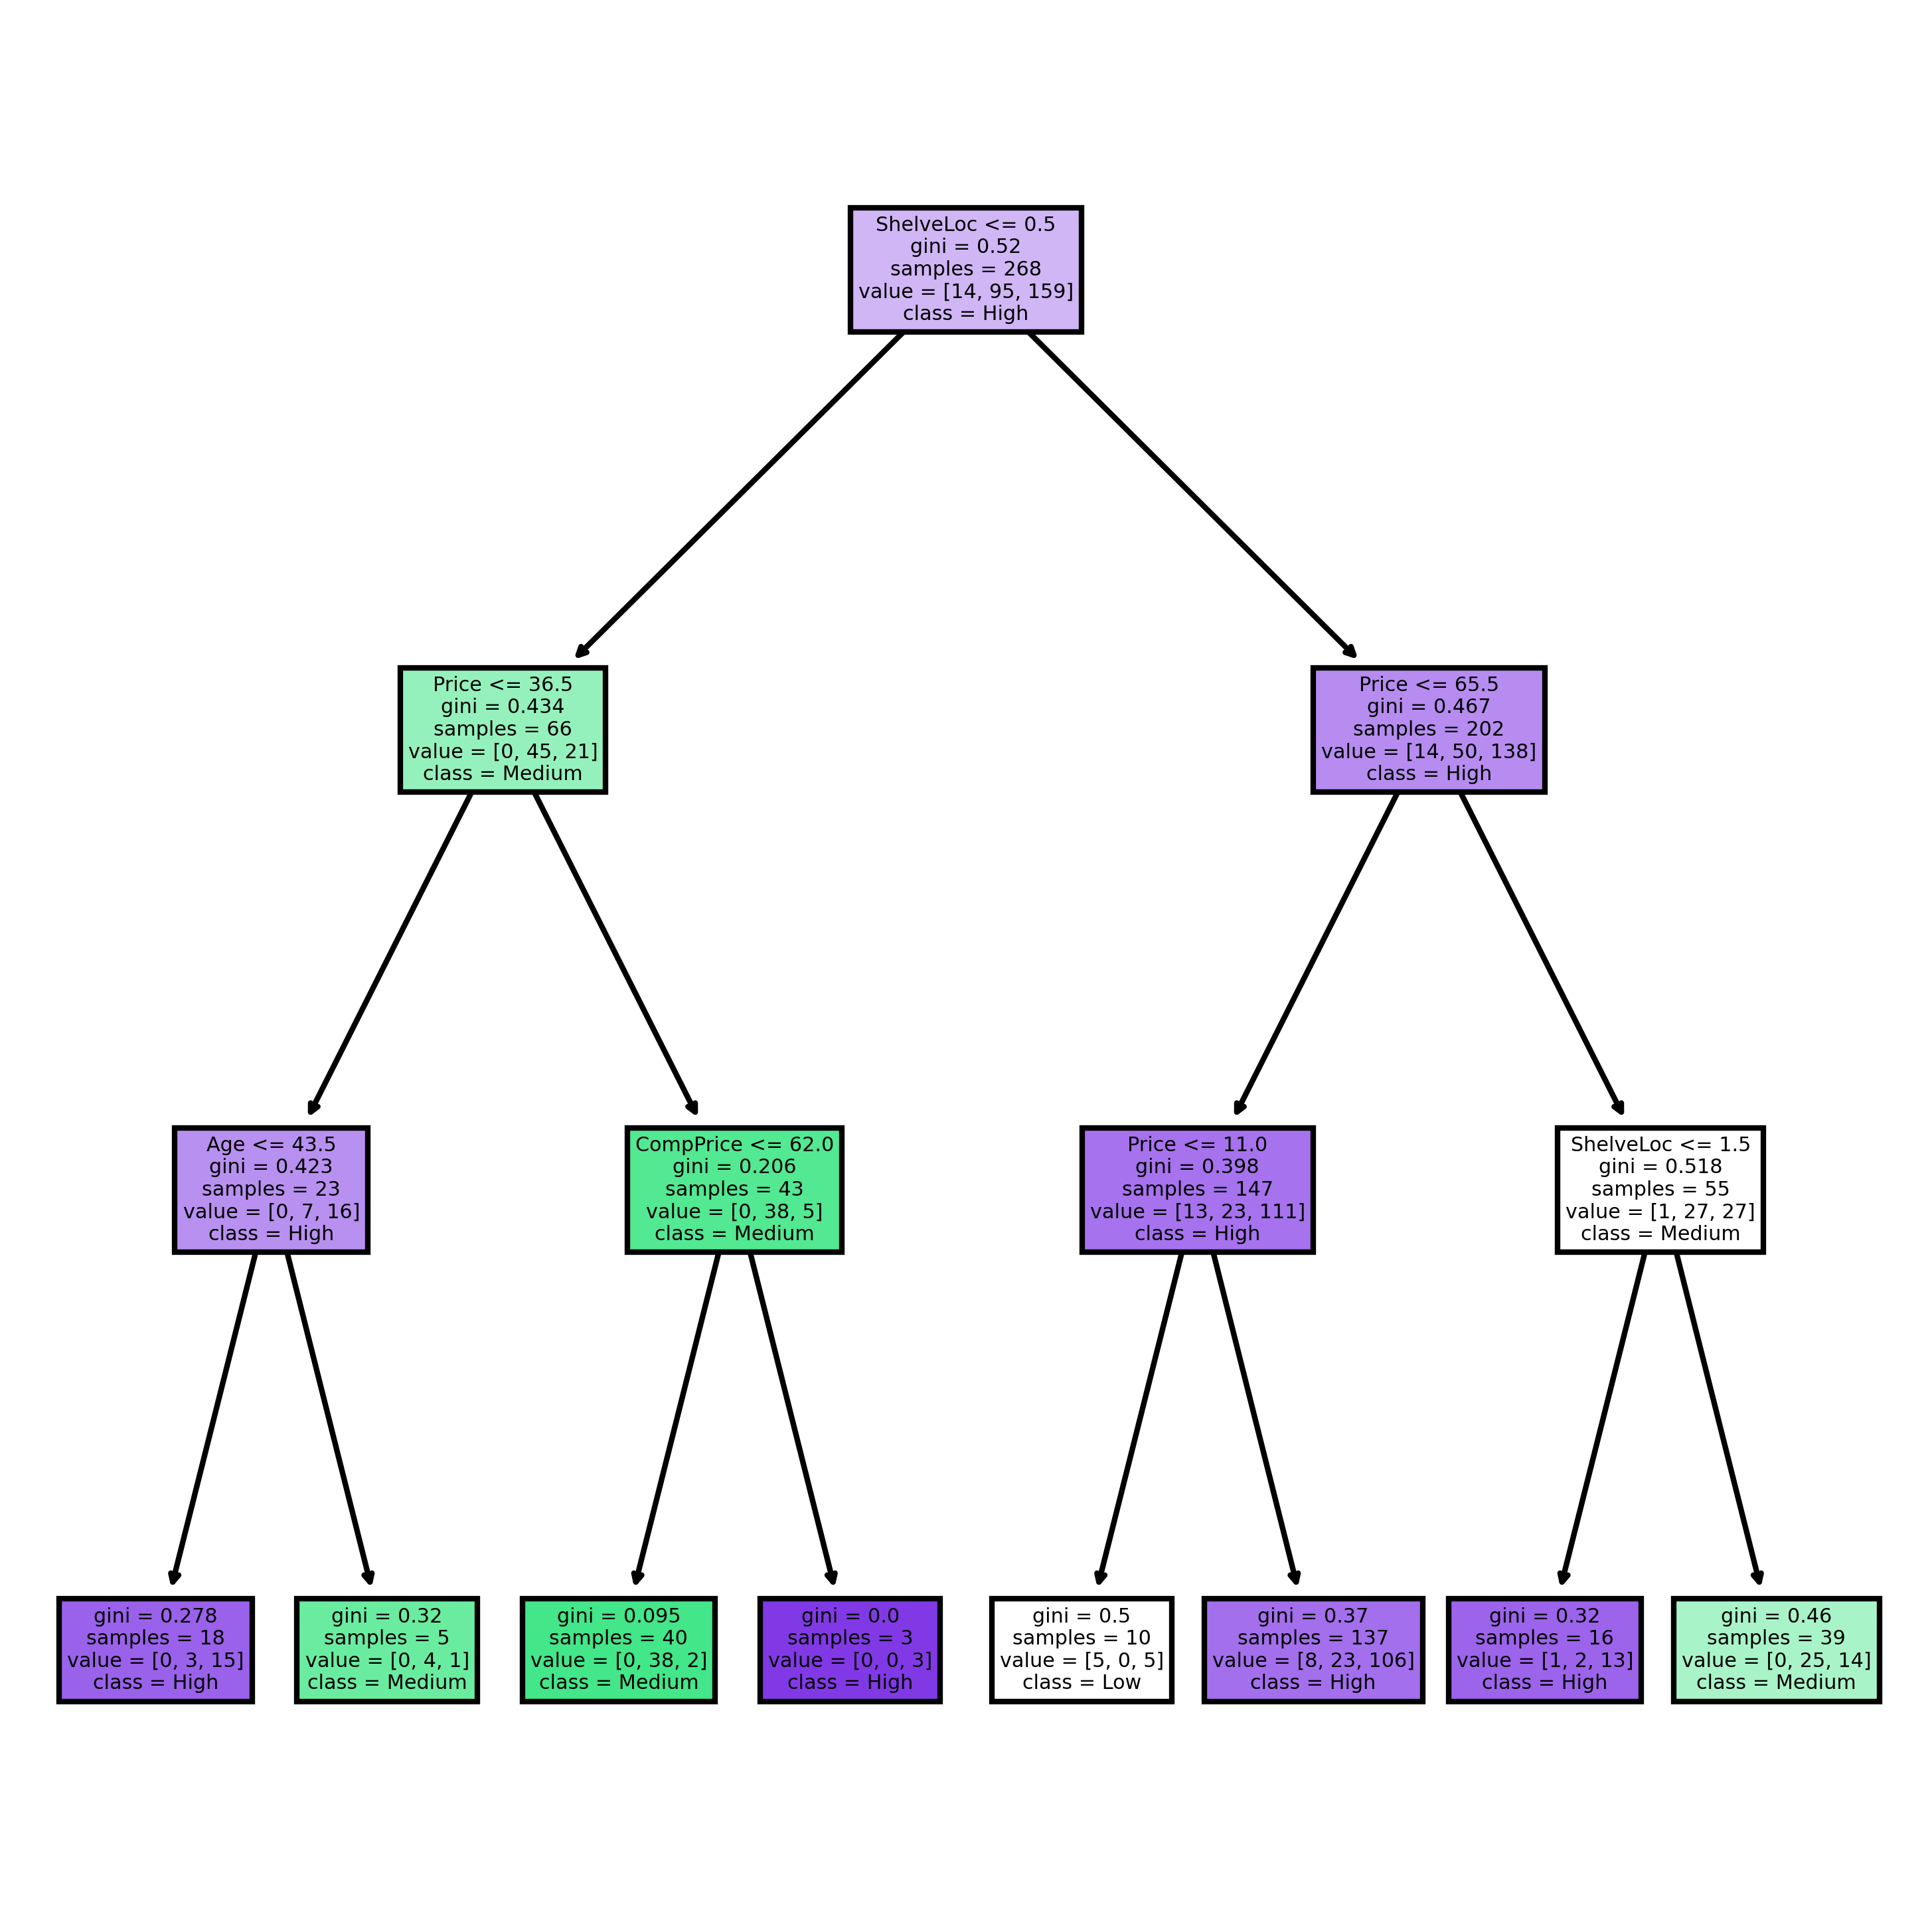

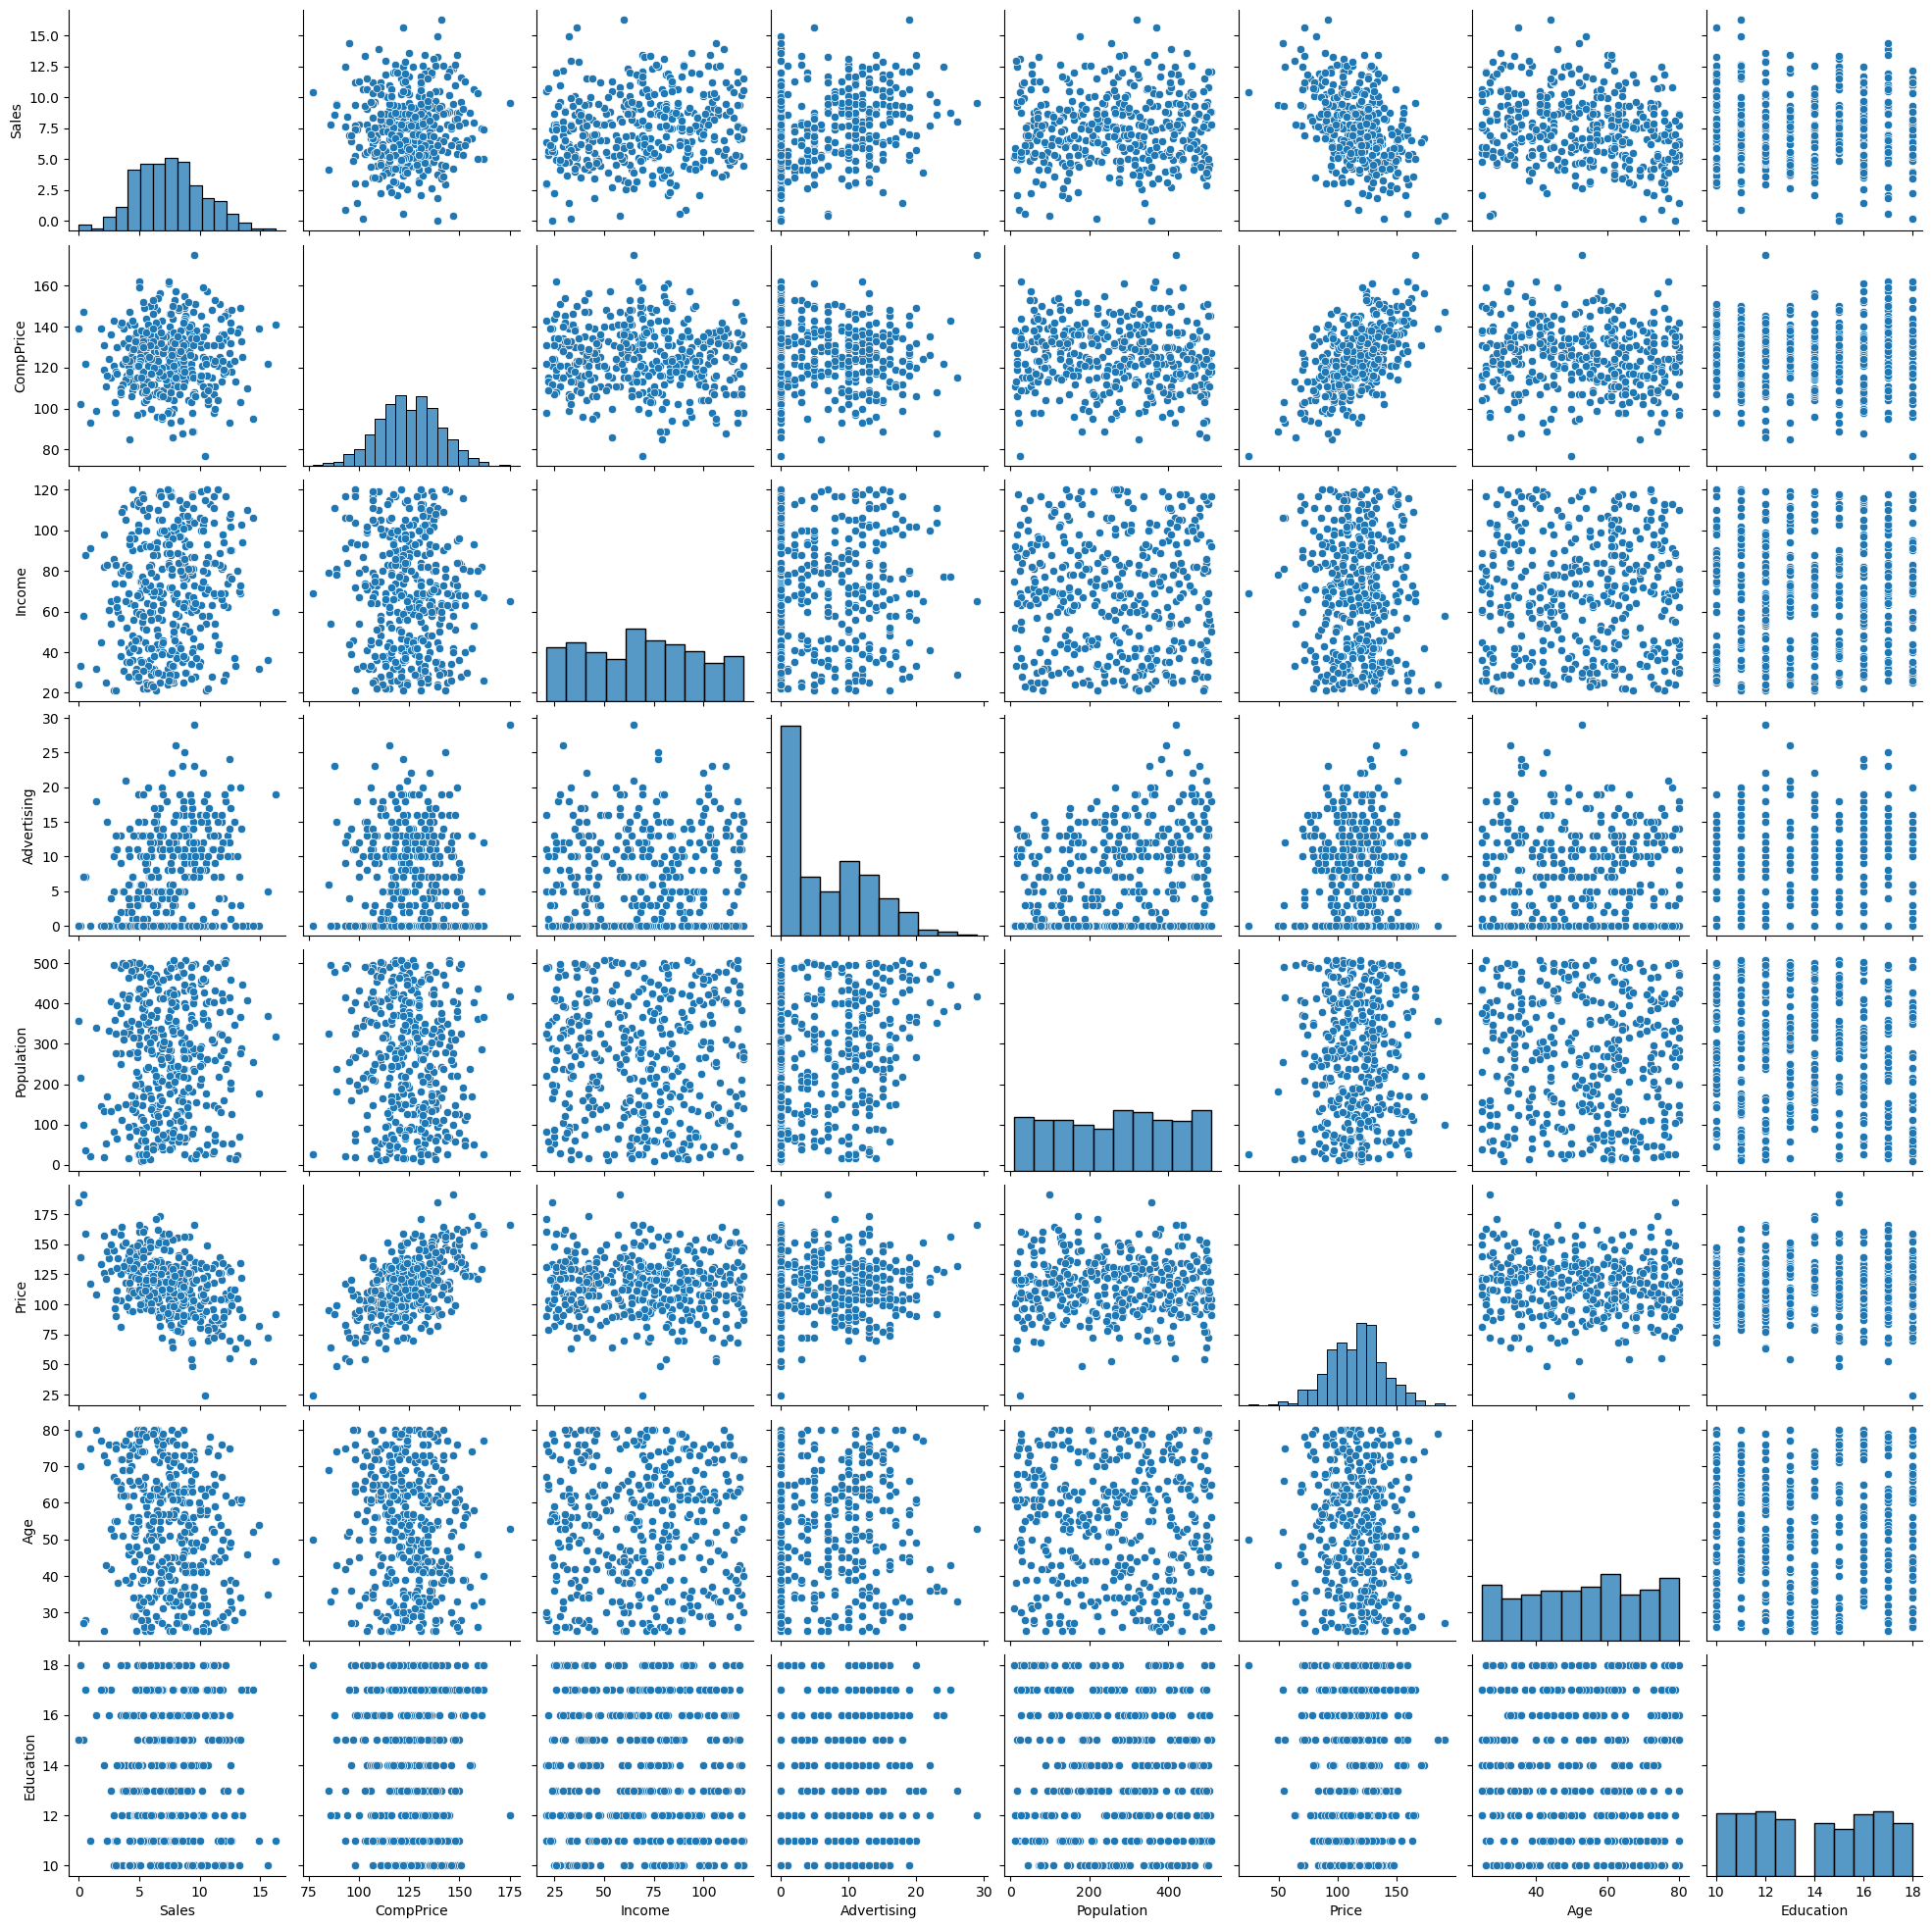

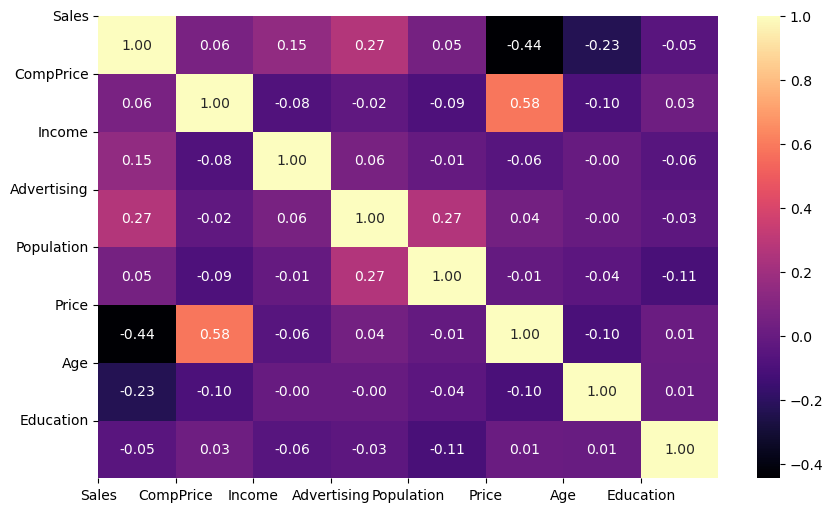

In [67]:
corr = company.corr()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

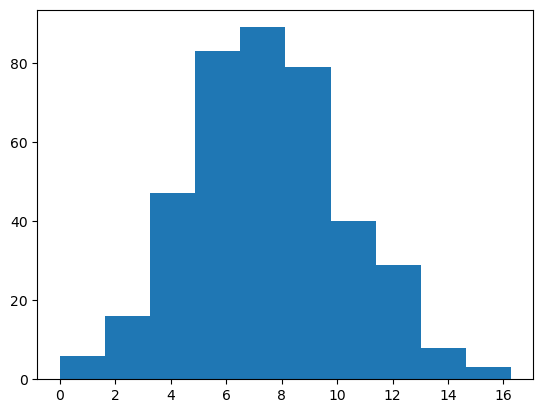

In [68]:
plt.hist('Sales',data=company)
plt.show()

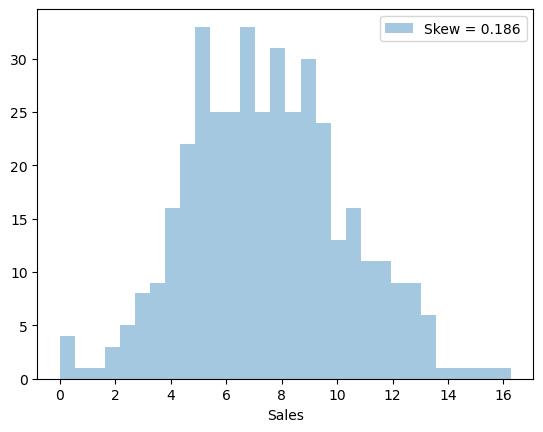

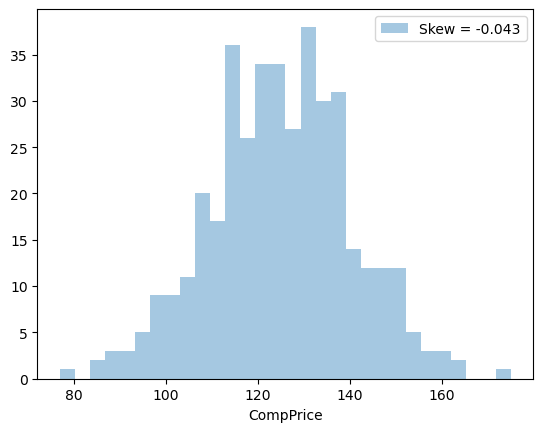

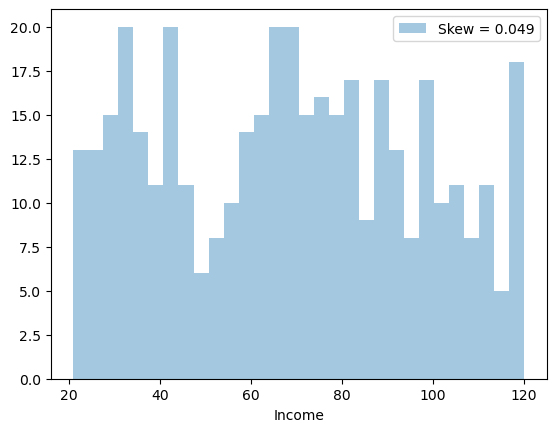

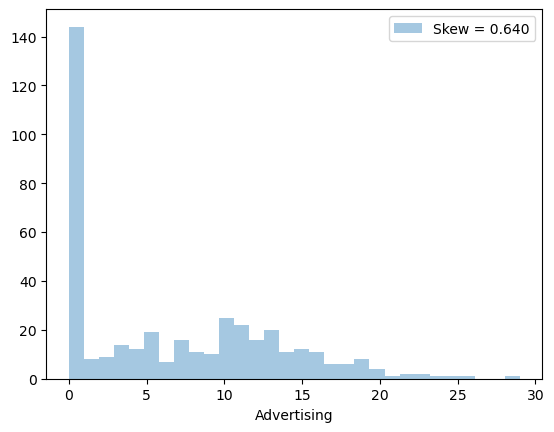

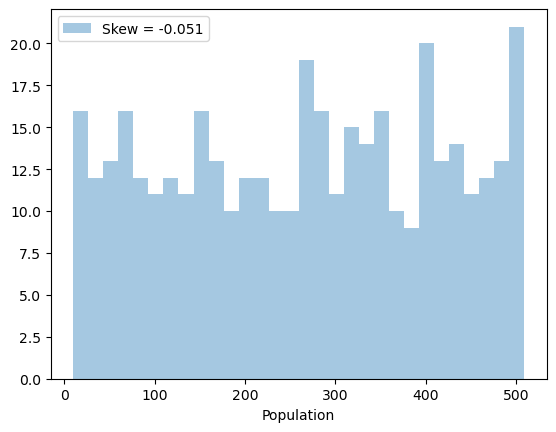

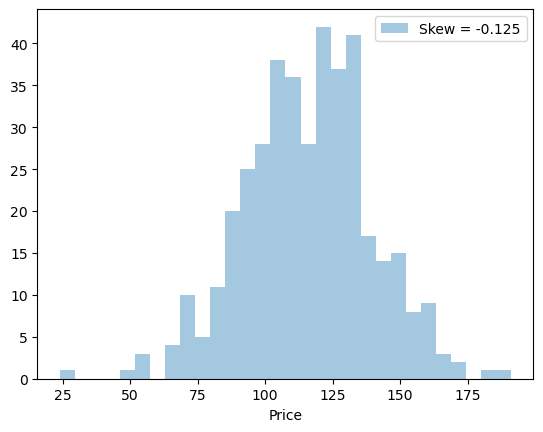

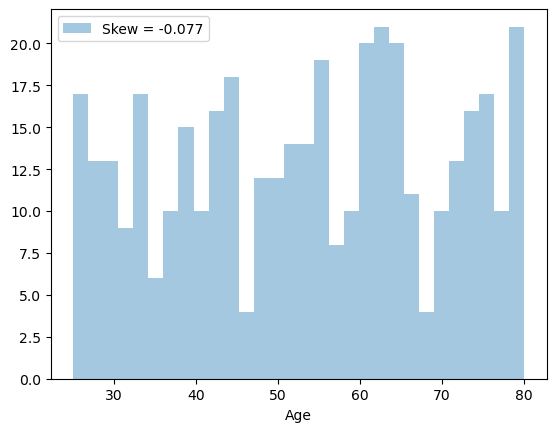

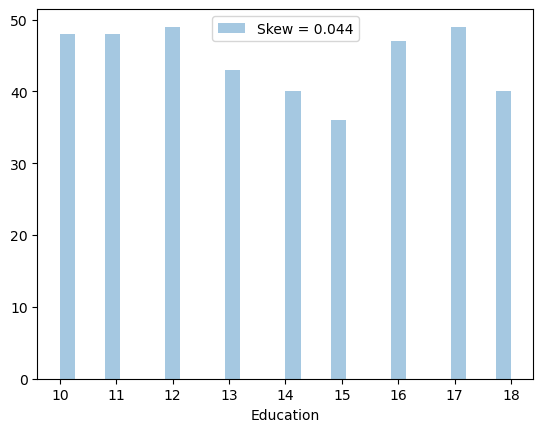

In [69]:
numerical_features=[feature for feature in company.columns if company[feature].dtypes != 'O']
for feat in numerical_features:
    skew = company[feat].skew()
    sns.distplot(company[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [70]:
ot=company.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)


In [71]:
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])

<AxesSubplot:xlabel='Sales'>

In [72]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=company[numerical_features], orient="h")


<AxesSubplot:>

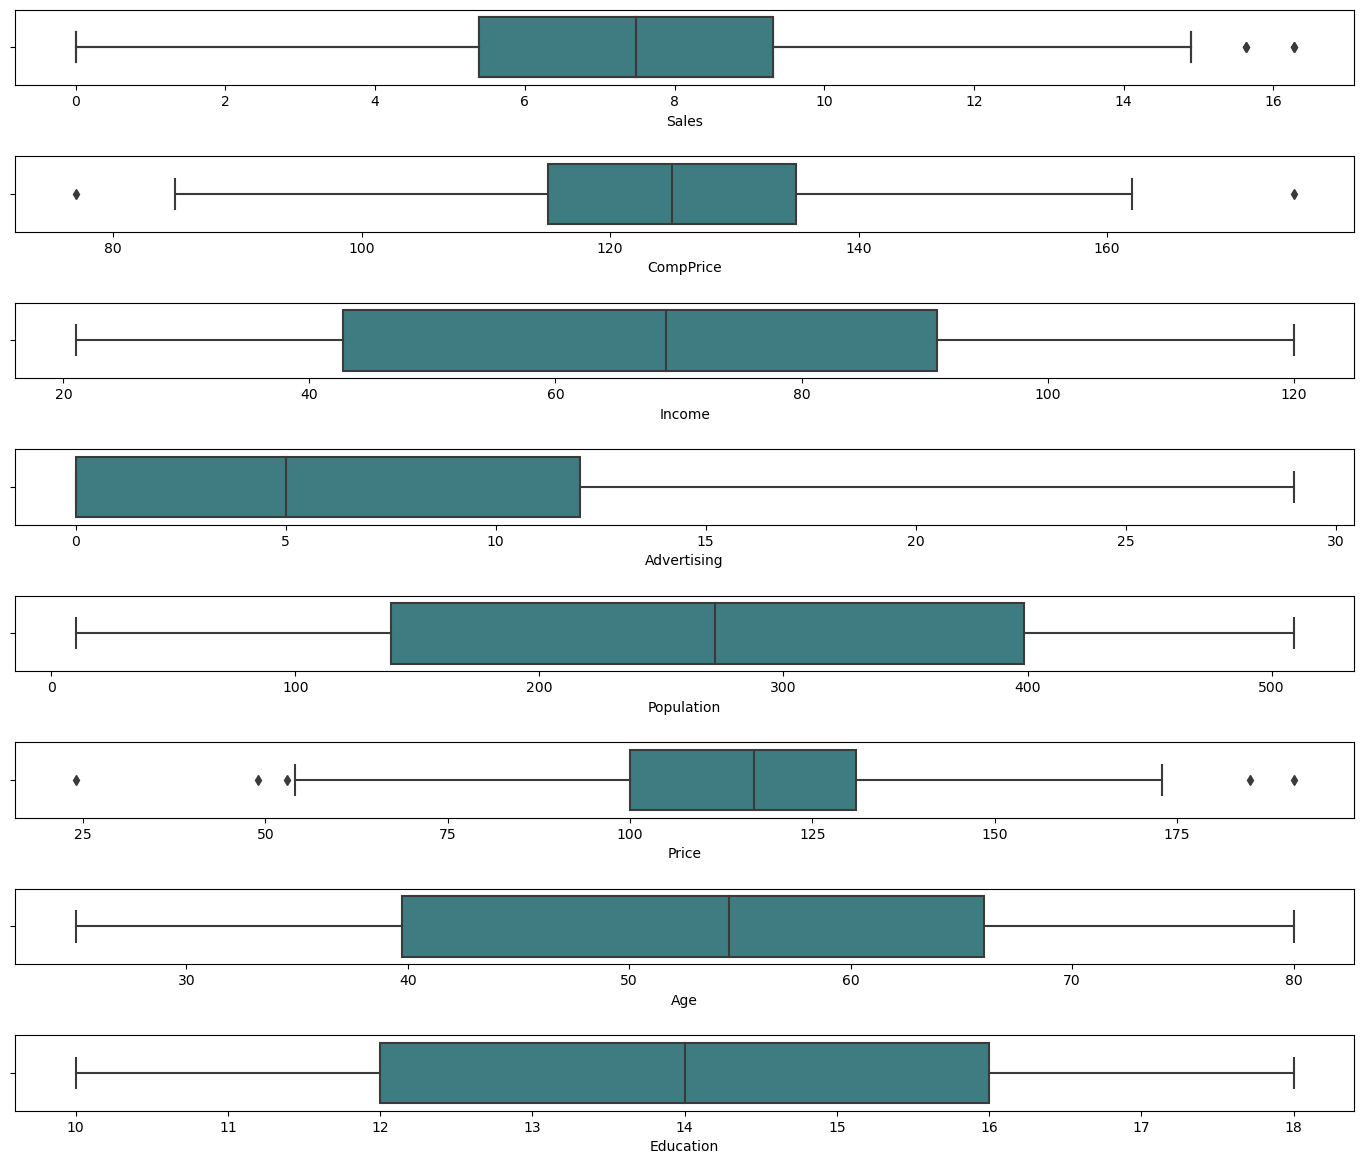

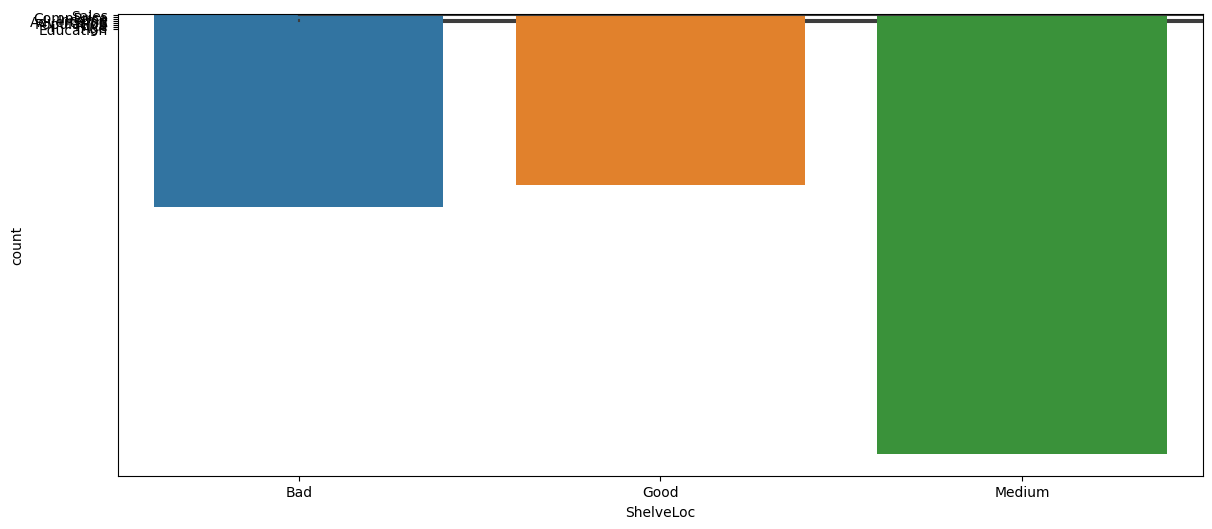

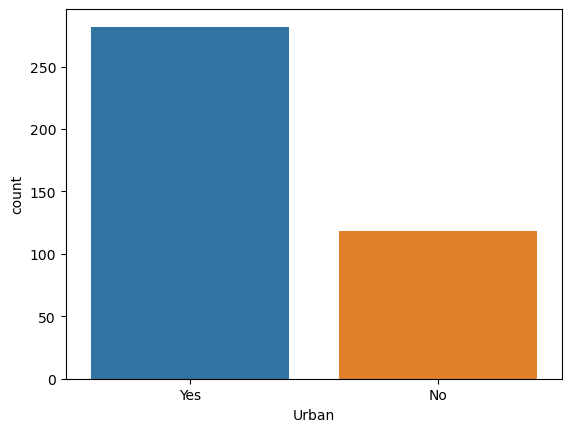

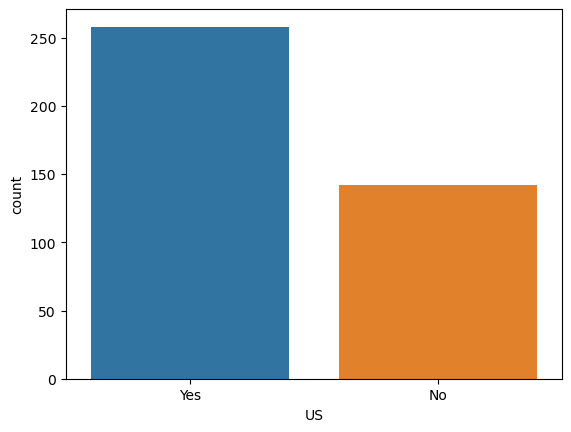

In [73]:
sns.countplot(company['ShelveLoc'])
plt.show()

sns.countplot(company['Urban'])
plt.show()

sns.countplot(company['US'])
plt.show()

In [74]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
company['Sales'] = pd.cut(x=company['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

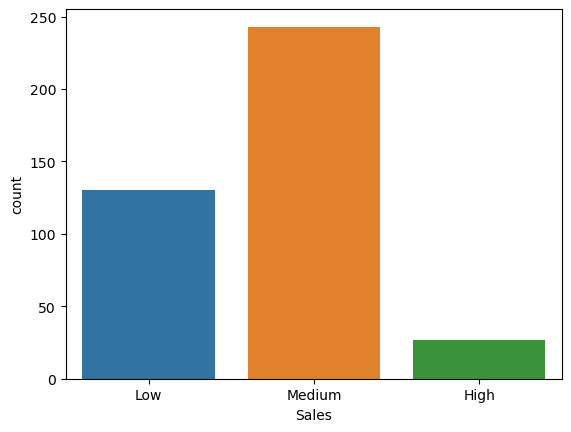

In [75]:
sns.countplot(company['Sales'])
plt.show()

In [76]:
company['Sales'].value_counts()


Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [77]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No


In [78]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

company['Sales'] = label_encoder.fit_transform(company['Sales'])
company['CompPrice'] = label_encoder.fit_transform(company['CompPrice'])
company['Income'] = label_encoder.fit_transform(company['Income'])
company['Advertising'] = label_encoder.fit_transform(company['Advertising'])
company['Population'] = label_encoder.fit_transform(company['Population'])
company['Price'] = label_encoder.fit_transform(company['Price'])
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Age'] = label_encoder.fit_transform(company['Age'])
company['Education'] = label_encoder.fit_transform(company['Education'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,49,51,11,141,54,0,17,7,1,1
1,2,22,27,16,129,18,1,40,0,1,1
2,2,24,14,10,138,15,2,34,2,1,1
3,2,28,77,4,249,31,2,30,4,1,1
4,1,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,49,85,17,104,62,1,8,4,1,1
396,2,50,2,3,17,54,2,30,1,0,1
397,2,71,5,12,195,91,2,15,8,1,1
398,1,12,57,7,145,29,0,25,2,1,1


In [79]:
# Dividing data into independent variables and dependent variable
X = company.drop('Sales', axis = 1)
y = company['Sales']

In [80]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49,51,11,141,54,0,17,7,1,1
1,22,27,16,129,18,1,40,0,1,1
2,24,14,10,138,15,2,34,2,1,1
3,28,77,4,249,31,2,30,4,1,1
4,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...
395,49,85,17,104,62,1,8,4,1,1
396,50,2,3,17,54,2,30,1,0,1
397,71,5,12,195,91,2,15,8,1,1
398,12,57,7,145,29,0,25,2,1,1


In [81]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [82]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)


In [83]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,19,17,0,127,16,0,47,4,0,0
177,49,50,0,76,28,2,2,7,1,1
119,41,71,8,70,62,2,39,2,1,1
194,23,75,18,257,62,2,20,1,1,1
229,10,81,0,214,10,2,2,8,0,0
...,...,...,...,...,...,...,...,...,...,...
71,59,29,16,76,83,2,33,7,0,1
106,13,12,0,111,73,2,45,8,0,0
270,30,5,0,145,23,1,1,0,1,0
348,43,79,20,246,41,1,24,1,1,1


In [84]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,10,0,11,169,24,0,51,1,0,1
280,32,63,10,264,78,0,26,0,1,1
33,25,17,13,164,62,1,25,6,1,1
210,36,20,2,188,57,0,22,4,0,1
93,56,9,0,35,38,2,30,7,1,0
...,...,...,...,...,...,...,...,...,...,...
332,17,12,20,186,38,2,36,2,1,1
167,17,51,0,110,27,2,35,3,1,0
245,25,22,0,101,22,1,32,0,0,1
311,57,46,12,171,66,0,26,4,1,1


In [85]:
 y_train

258    1
177    2
119    2
194    2
229    2
      ..
71     2
106    1
270    2
348    0
102    1
Name: Sales, Length: 268, dtype: int32

In [86]:
y_test

209    1
280    1
33     2
210    1
93     2
      ..
332    1
167    2
245    2
311    2
145    2
Name: Sales, Length: 132, dtype: int32

# Building model based on C5.0 Algorithm


In [87]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [88]:
from sklearn import tree

In [89]:
# Plotting Decision tree
tree.plot_tree(model_c5);

In [90]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [91]:
# Predicting Data
preds = model_c5.predict(x_test)
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [92]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,1,0,12
1,0,15,20
2,0,11,73


In [93]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6742424242424242

# Building model based on CART Algorithm

In [94]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [95]:

# Plotting Decision tree
tree.plot_tree(model_CART);

In [96]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [97]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    89
1    38
0     5
dtype: int64

In [98]:
preds

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [99]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,2,0,11
1,0,23,12
2,3,15,66


In [100]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.6893939393939394